<center>
<img src="./images/ods_stickers.jpg"/>
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)

http://www.famaf.proed.unc.edu.ar/course/view.php?id=470



# IntML2020- Análisis de Componentes y Discriminantes

## Ejercicio 1 

In [1]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from to_csv import get_csv

In [2]:
X, y = load_breast_cancer(return_X_y=True)

a) Estudie el grupo de datos sobre cancer de mama, diga cuantas clases hay, cuantos datos y cuantas variables.

<span style="color:green"> 
Respuesta
<span>

El dataset es una copia de [Wisconsin Diagnostic Breast Cancer (WDBC)](https://goo.gl/U2Uwz2).
Existen dos clases: **B** (benigno) y **M** (maligno). Hay 10 variables que son computadas a partir imágenes digitales de punciones-aspiraciones con aguja fina (FAAP) de masas mamarias. Ejemplos de imagen son las siguientes:

<img src="./images/smear_cancer.png" style="float: center;" width="600" />

A la izquierda se observa una muestra pertenienciente a un tumor benigno y la derecha uno maligno.

Estas variables describen las siguientes características relativas al núcleo de las células:

1. radio (media de distancias del centro a los puntos en el períemtro)
2. textura (desviación estándar de los valores de escala gris)
3. perimetro
4. área
5. suavidad (variación local en la longitud de radio)
6. compactness (períemtro^2 / área - 1.0)
7. concavidad (gravedad de las poriciones cóncavas del contorno)
8. puntos cóncavos (número de poriciones cóncavas del contorno)
9. simetría
10. dimensión fractal (“aproximación de linea costera” - 1)

Se calculó la media, el error estándar y el "peor" o mayor (promedio de los tres peores / mayores valores) de estas características para cada imagen, dando como resultado 30 características. Por ejemplo, el campo 0 es Radio medio, el campo 10 es Radio SE, el campo 20 es Peor radio.

Hay 569 instancias, de las cuales 357 son de clase B y 212 de la clase M.

In [3]:
X.shape

(569, 30)

b) Estudie la siguiente afirmación: "PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class separability." Para ello proyecte las clases en las dos primeras componentes principales y en ''el'' discriminante. 

<span style="color:green"> 
Respuesta
<span>

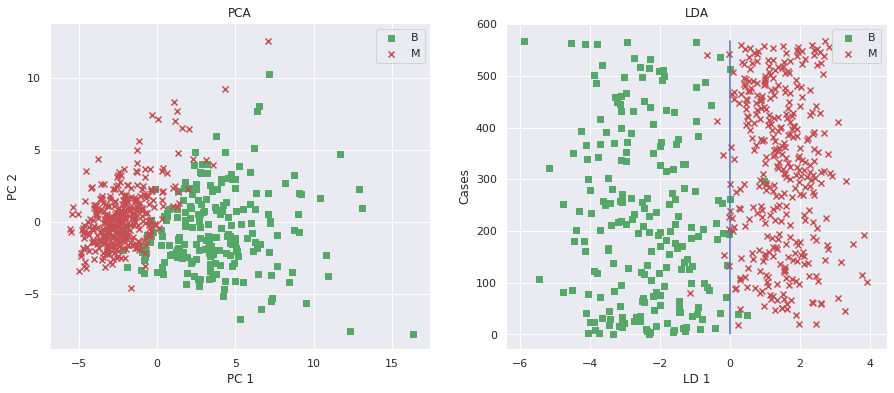

In [4]:
# standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)

# PCA transformation:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = ['g', 'r', 'b']
markers = ['s', 'x', 'o']
labels = ['B', 'M']

# Plot PCA
for l, c, m in zip(np.unique(y), colors, markers):
    axes[0].scatter(X_pca[y==l, 0],
                   X_pca[y==l, 1],
                   c=c, label=labels[l], marker=m)
    axes[0].set_xlabel('PC 1')
    axes[0].set_ylabel('PC 2')
    axes[0].legend(loc='best')
    axes[0].set_title('PCA')

# LDA transformation:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_std, y)
l = [i for i in range(0,569)]
# Create dataframe
df1 = pd.DataFrame(X_lda, columns=['LD1'])
df1['cases'] = l
df1['species'] = y
# Plot LDA
for l, c, m in zip(np.unique(y), colors, markers):
    axes[1].scatter(df1.loc[df1.species == l].LD1,
                    df1.loc[df1.species == l].cases,
                    c=c, label=labels[l], marker=m)
vert_line_data = np.array([0 for i in range(0,569)]) 
axes[1].plot(vert_line_data, df1.cases, 'b')
axes[1].set_xlabel('LD 1')
axes[1].set_ylabel('Cases')
axes[1].legend(loc='best')
axes[1].set_title('LDA');

c) Diga si las clases son linealmente separables en estos espacios. 

<span style="color:green"> 
Respuesta
<span>

Con estos métodos y en estos espacios no lo son. Tanto en PCA como en LDA hay superposición de puntos; aunque en LDA es mucho menor. 

## Ejercicio 2

Estudie el grupo de datos T8_3_FOOTBALL.dat. Se presentan 3 grupos de 30 sujetos cada uno, el primero de jugadores de futbol americano de secundaria (grupo1), el segundo de jugadores de universidad (grupo 2) y el tercero de control  (grupo 3). Las variables medidas son WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW, y son mediciones de la cabeza de los sujetos. 

In [5]:
# transform to csv 
get_csv('T8_3_FOOTBALL.DAT')

df_foot = pd.read_csv('T8_3_FOOTBALL.csv')
df_foot.head()

,GR,WDIM,CIRCUM,FBEYE,EYEHD,HEARHD,JAW
0,1,13.5,57.15,19.5,12.5,14.0,11.0
1,1,15.5,58.42,21.0,12.0,16.0,12.0
2,1,14.5,55.88,19.0,10.0,13.0,12.0
3,1,15.5,58.42,20.0,13.5,15.0,12.0
4,1,14.5,58.42,20.0,13.0,15.5,12.0


* (a) Realice un análisis discriminante sobre un 80% del conjunto datos, clasificando el 20% restante. 
* (b) Compare con los errores obtenidos clasificando con un Naive Gauss sobre el mismo conjunto de datos.
* (c) Escriba la matriz de confusion de ambos métodos. 


Para computar el error aparente puede usar la funcion 

In [6]:
# Ejemplo sobre iris!!!
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
qda = QuadraticDiscriminantAnalysis()
(iris_data, iris_target) = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
clf = qda.fit(X_train, y_train)
clf.score(X_test, y_test) 

1.0

<span style="color:green"> 
Respuesta a)
<span>

In [9]:
X, y = df_foot.iloc[:, 1:].values, df_foot.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# fit the LDA classifier
lda = LDA(n_components=2)
clf_lda = lda.fit(X_train_std, y_train)
y_predict_lda = clf_lda.predict(X_test_std)
score = clf_lda.score(X_test_std, y_test)*100
print('La precisión usando LDA al clasificar fue de: %2.2f %%.' % score)

La precisión usando LDA al clasificar fue de: 72.22 %.


<span style="color:green"> 
Respuesta b)
<span>

In [10]:
# fit the Gaussian Naives classfier
gnb = GaussianNB()
clf_gnb = gnb.fit(X_train, y_train)
score = clf_gnb.score(X_test, y_test)*100
y_predict_gnb = clf_gnb.predict(X_test)
print('La precisión usando LDA al clasificar fue de: %2.2f %%.' % score)

La precisión usando LDA al clasificar fue de: 61.11 %.


<span style="color:green"> 
Respuesta c)
<span>

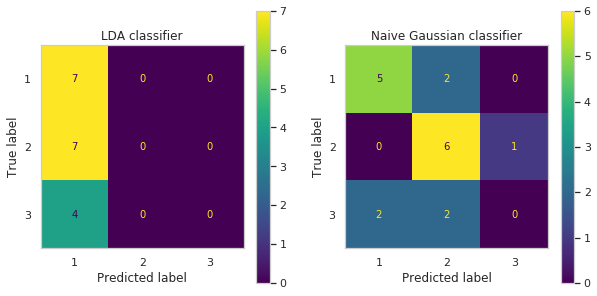

In [12]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_confusion_matrix(clf_lda, X_test, y_test, 
                      display_labels=[1, 2, 3], 
                      ax=axes[0])
plot_confusion_matrix(clf_gnb, X_test, y_test, 
                      display_labels=[1, 2, 3], 
                      ax=axes[1])
axes[0].set_title('LDA classifier');
axes[1].set_title('Naive Gaussian classifier');
sns.set_style("whitegrid", {'axes.grid' : False});

## Ejercicio 3: Limpieza de ruido y selección de dimensión. 
 
* (a) Trabaje con el dataset digits, estudie cuantos datos tiene, cuantas variables  y cuantas clases.

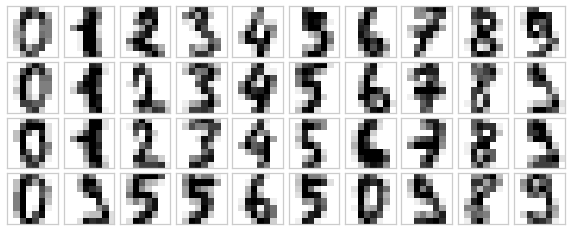

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [14]:
digits.data.shape

(1797, 64)

<span style="color:green"> 
Respuesta a)
<span>

Esta es una copia del dataset de dígitos escritos a mano de [UCI ML](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).


El conjunto de datos contiene imágenes de dígitos escritos a mano: por lo que se tienen 10 clases donde cada una se refiere a un dígito (del 0 al 9). Cada imagen es de 8x8 pixeles en el rango 0..16, por lo que tenemos 64 variables representado cada pixel en cada imagen. El número total de images es de 1797, con aproximadamente 180 instancias por cada clase. 

* Realice un análisis de componentes principales y extraiga las dos primarias. Plotee 

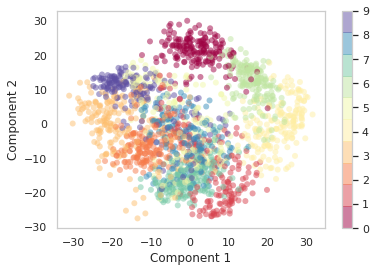

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

* (b) Explique  usando el radio de varianza explicada porque este colorido dibujo no permite distinguir clases. Cuantas dimensiones son necesarias para obtener un 50% de varianza explicada?  Y un 80%?

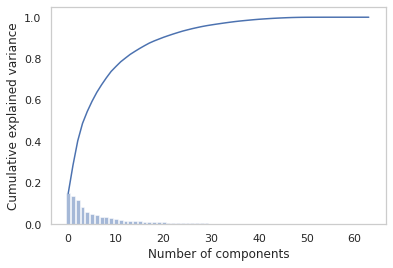

In [16]:
pca = PCA().fit(digits.data)
plt.bar(range(0, 64), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

<span style="color:green"> 
Respuesta b)
<span>
    
Con dos componentes apenas se captura un poco menos del 30% de la variabillidad de los datos. Esto quiere decir que con esta proyección se esta perdiendo mucha información aún, por eso es deseable maximizar la varianza explicada en los primeros $k$ componentes y usarlos en la proyección, para intentar perder la menor cantidad de información. Si bien esto no asegura que vayamos a tener discrminabilidad en las proyecciones, en este caso se ve que no todas las clases quedan bien separadas aún. 

In [17]:
v_expl = sum(pca.explained_variance_ratio_[:2])*100
print('La varianza explicada con dos componentes %2.3f %%.' % v_expl)

La varianza explicada con dos componentes 28.509 %.


Con 5 componentes se obtiene el 54 % de la variable explicada. Mientras que con 13 componentes se obtiene el 80%.

In [18]:
v_expl = sum(pca.explained_variance_ratio_[:5])*100
print('La varianza explicada con dos componentes %2.3f %%.' % v_expl)
v_expl = sum(pca.explained_variance_ratio_[:13])*100
print('La varianza explicada con dos componentes %2.3f %%.' % v_expl)

La varianza explicada con dos componentes 54.496 %.
La varianza explicada con dos componentes 80.290 %.


* Si agregamos ruido a los digitos plotee el resultado

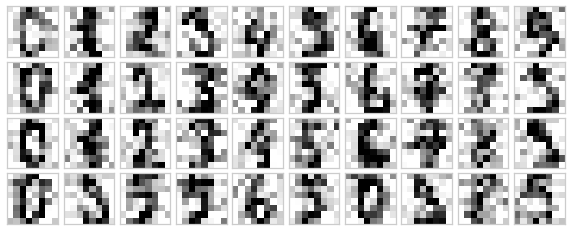

In [19]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

c)  Realice un análisis de componentes principales que preserve el 50% de la varianza. Diga cuantas componentes le quedan. 

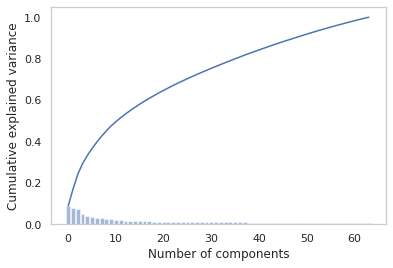

In [20]:
pca = PCA().fit(noisy)
plt.bar(range(0, 64), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [21]:
v_expl = sum(pca.explained_variance_ratio_[:12])*100
print('La varianza explicada con dos componentes %2.3f %%' % v_expl)

La varianza explicada con dos componentes 51.490 %


<span style="color:green"> 
Respuesta c)
<span>

Observando el gráfico y calculando se observa que con 12 componentes se preserva el 51 % de la varianza explicada.

* d) Realice una clasificación con Naive Bayes sobre las primeras dos componentes, sobre las primeras 12 de los datos originales y sobre las primeras doce de los datos ruidosos. Diga cual clasificacion es mejor usando errores aparentes.

<span style="color:green"> 
Respuesta d)
<span>

In [22]:
# Split the data in train and test set (80/20)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
# 2 PC
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
gnb = GaussianNB()
clf = gnb.fit(X_train_pca, y_train)
score = clf.score(X_test_pca, y_test)*100
print('-- Sobre datos originales (sin ruido) --')
print('\t * La precisión para Gaussian Naive Bayes con 2 PC fue de: %2.2f %%.' % score)

# 12 PC
pca = PCA(12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
gnb = GaussianNB()
clf = gnb.fit(X_train_pca, y_train)
score = clf.score(X_test_pca, y_test)*100
print('\t * La precisión para Gaussian Naive Bayes con 12 PC fue de: %2.2f %%.'% score)

-- Sobre datos originales (sin ruido) --
	 * La precisión para Gaussian Naive Bayes con 2 PC fue de: 65.00 %.
	 * La precisión para Gaussian Naive Bayes con 12 PC fue de: 92.50 %.


In [24]:
# Now use noisy data
X = noisy
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)
# 2 PC
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
gnb = GaussianNB()
clf = gnb.fit(X_train_pca, y_train)
score = clf.score(X_test_pca, y_test)*100
print('-- Sobre datos ruidosos --')
print('\t * La precisión para Gaussian Naive Bayes con 2 PC fue de: %2.2f %%.' % score)

# 12 PC
pca = PCA(12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
gnb = GaussianNB()
clf = gnb.fit(X_train_pca, y_train)
score = clf.score(X_test_pca, y_test)*100
print('\t * La precisión para Gaussian Naive Bayes con 12 PC fue de: %2.2f %%.'% score)

-- Sobre datos ruidosos --
	 * La precisión para Gaussian Naive Bayes con 2 PC fue de: 53.33 %.
	 * La precisión para Gaussian Naive Bayes con 12 PC fue de: 88.33 %.


* e) Reconstruya los datos a partir de las 12 componentes principales ruidosas y plotee el resultado. 

<span style="color:green"> 
Respuesta e)
<span>
    
Cuando se calculan y conservan todos los autovectores (componentes principales), es posible recuperar de nuevo los valores iniciales. Solo es necesario invertir el proceso:

$$ Datos\;originales=(Autovectores^{T}) \times (Principal\;Component\;Scores) + Medias\;Originales$$



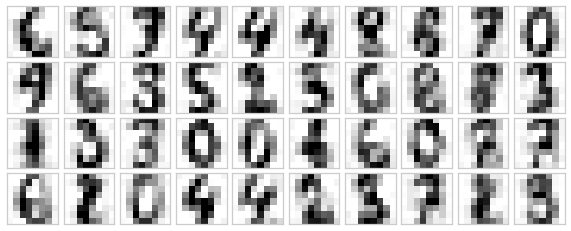

In [25]:
X_noisy = np.r_[X_train_pca, X_test_pca]
restore_data = X_noisy.dot(pca.components_) + pca.mean_
plot_digits(restore_data)

Es el mismo resultado que se obtiene con el método```inverse_transform```.

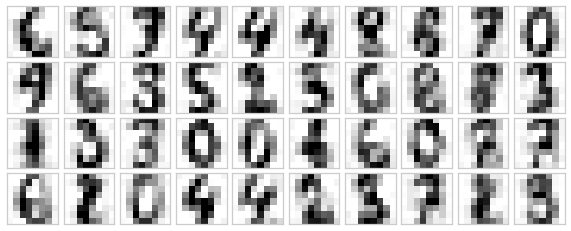

In [26]:
restore_data = pca.inverse_transform(X_noisy)
plot_digits(restore_data)

## Ejercicio 4: 

* a) Levante el grupo de datos Labeled Faces in the Wild dataset, y diga cuantas variables tiene, cuantos datos, cuantas clases y la dimension del espacio de discriminación.  
* Realice un estudio de componentes principales con 150 componentes, usando la kwyword randomized para acelerar el algoritmo. 

In [27]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [28]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


<span style="color:green"> 
Respuesta a)
<span>
    
Este conjunto de datos es una colección de imágenes JPEG de personas famosas recopiladas en Internet, todos los detalles están disponibles en el [sitio web oficial](http://vis-www.cs.umass.edu/lfw/). Originalmente cuenta con 13233 imágenes, 5749 personas (clases) y 1680 personas con dos o más fotos. Con el parámetro ```min_faces_per_person = 60``` se obtienen fotos de personas que poseen como mínimo 60 diferentes fotografías. En este caso, se obtuvieron 1348 imágenes correspondientes a 8 personajes diferentes. Cada fila corresponde a una imagen de cara descifrada de tamaño original 62 x 47 píxeles, donde cada pixel toma valores entre 0 y 255.

In [29]:
faces.data.shape

(1348, 2914)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',whiten=False)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

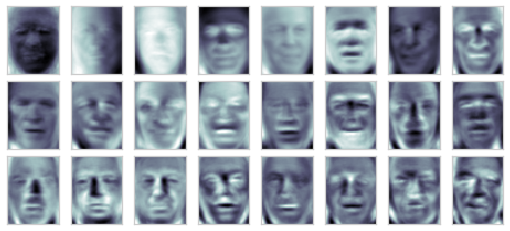

In [31]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

* b) Diga cual es la varianza explicada por las primeras 150 componentes. 

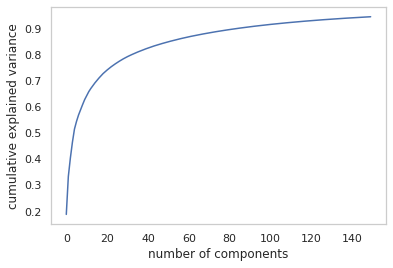

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<span style="color:green"> 
Respuesta b)
<span>
    

In [33]:
v_expl = sum(pca.explained_variance_ratio_[:150])*100
print('La varianza explicada con dos componentes %2.3f %%' % v_expl)

La varianza explicada con dos componentes 94.573 %


In [34]:
# Compute the components and projected faces

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

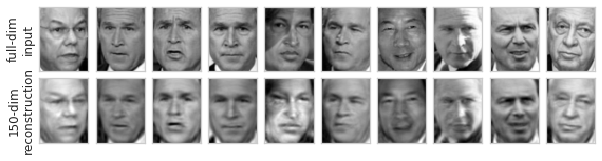

In [35]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

* c) Clasifique las caras con el método de su elección y compute el error aparente. 

<span style="color:green"> 
Respuesta c)
<span>
    

In [36]:
X, y = fetch_lfw_people(min_faces_per_person=60, return_X_y=True)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

pca = PCA(n_components=150, svd_solver='randomized',whiten=False)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf = LDA()
clf.fit(X_train_pca, y_train)
score = clf.score(X_test_pca, y_test)
print('* La precisión en la detección de caras usando LDA con 150 PC fue de: %2.2f %%.'% score)

* La precisión en la detección de caras usando LDA con 150 PC fue de: 0.83 %.
